$
In\;the\;name\;of\;God 
\\HW3\;NeuralNetwork
\\Abbas\;Mohamadiyan\;810898059
$

# Part1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm.notebook import tqdm

In [2]:
def randcir(X, Y, r): # X & Y represent the center & r is for radius
    while True:
        x = random.random()*2 -1
        y = random.random()*2 -1
        if x*x + y*y < 1:
            return (x*r+X, y*r+Y)
        

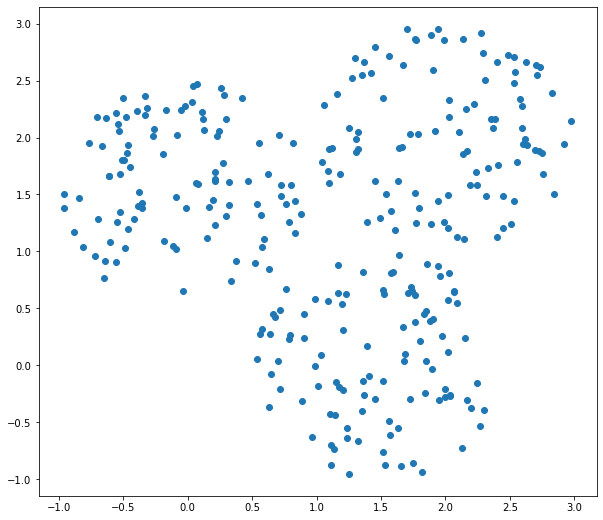

In [3]:
l = []
w = []
y0 = []
for i in range(100):
    x, y = randcir(2, 2, 1)
    l.append(x)
    w.append(y)
    y0.append(0)
    
for i in range(100):
    x, y = randcir(0, 1.5, 1)
    l.append(x)
    w.append(y)
    y0.append(1)
    
for i in range(100):
    x, y = randcir(1.5, 0, 1)
    l.append(x)
    w.append(y)
    y0.append(2)
    
plt.figure(figsize=(10,9))    
plt.scatter(l, w)

plt.show()

In [4]:
Dy = np.hstack((l, w, y0))
Dy = np.reshape(Dy, (300, 3), order='F') #the order 'F' was a tough one!
np.random.shuffle(Dy)
D = Dy[:,0:2]
ys = Dy[:,2]
n,d = D.shape
k = 3
Dic = {0:[1,0,0],
       1:[0,1,0],
       2:[0,0,1]}

#Y = np.array(list(map(lambda x:Dic[x],ys)))
Y = ys.reshape(n, 1)
X = D


In [5]:
trsize = int(0.7*n)
vasize = int(0.85*n)
Xt = X[0:trsize, :] ; Yt = Y[0:trsize]
Xv = X[trsize:vasize, :] ; Yv = Y[trsize:vasize]
Xte = X[vasize:n, :] ; Yte = Y[vasize:n]
print(Xt.shape)
print(Xv.shape)
print(Xte.shape)

(210, 2)
(45, 2)
(45, 2)


In [6]:
print(X[209,:] == Xt[209,:])
print(X[210,:] == Xv[0,:])
print(X[255,:] == Xte[0,:])

[ True  True]
[ True  True]
[ True  True]


In [7]:
def f1(x): return np.tanh(x)
def df1(x): return 1 - np.power(np.tanh(x),2)
def f2(x): return x
def df2(x): return 1

def aug(X):                                 #puts a 1 column in front of matrix
    n = len(X)
    X1 = np.ones((n,1))
    return np.hstack((X1,X))

def predict(X,W1,W2):                       #the name suggests =)
    Z = f1( aug(X) @ W1)
    O = f2( aug(Z) @ W2)
    return O

def update_pars(Y,X,W1,W2):
    Xt = aug(X)
    Z = f1(Xt @ W1)
    Zt = aug(Z)
    dZ = df1(Xt @ W1)
    O = f2(Zt @ W2)
    G2 = (O - Y)/len(Y)
    dW2 = Zt.T @ G2
    W2 -= eta * dW2
    G1 = (G2 @ W2[1:].T)*dZ
    dW1 = Xt.T @ G1
    W1 -= eta * dW1


In [8]:
n,d,m,p = trsize,2,3,1

W1 = np.random.randn(d+1,m)
W2 = np.random.randn(m+1,p)

eta = 1e-1  # step size (learning rate)
num_steps = int(1e5)

for i in tqdm(range(num_steps)):

    update_pars(Yt,Xt,W1,W2)


  0%|          | 0/100000 [00:00<?, ?it/s]

# Part 2

In [9]:
def tuning(m, eta):
    n,d,p = trsize,2,1

    W1 = np.random.randn(d+1,m)
    W2 = np.random.randn(m+1,p)
    
    num_steps = int(1e5)

    for i in range(num_steps):

        update_pars(Yv,Xv,W1,W2)
    return W1, W2

In [10]:
ms = np.arange(2, 9, 1)
Errors = []
nu, d = Xv.shape
for i in ms:
    Ws = tuning(i, 1e-1)
    Errors.append(np.linalg.norm(Yv-predict(Xv, Ws[0], Ws[1]))**2/nu)

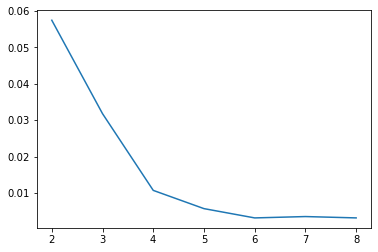

In [11]:
plt.plot(ms, Errors)
plt.show()

$
Assuming\;the\;Error\;function\;is\;convex
\\then\;the\;best"number\;of\;hidden\;layers"is\;6
$

In [ ]:
etas = np.arange(1e-2, 1e-1, 1e-2)
Errors = []
for i in etas:
    Ws = tuning(6, i)
    Errors.append(np.linalg.norm(Yv-predict(Xv, Ws[0], Ws[1]))**2/nu)

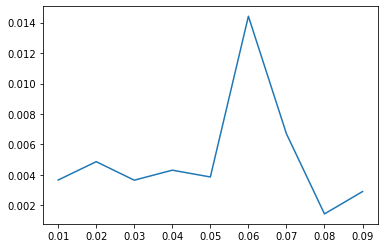

In [41]:
plt.plot(etas, Errors)
plt.show()

$$
Best\;\eta = 0.08
\\Best\;m = 5
$$

In [45]:
Ws = tuning(5, 0.08)

In [48]:
testerror = np.linalg.norm(Yte-predict(Xte, Ws[0], Ws[1]))**2/nu
print(testerror)

0.08536323263706677


$
That's\;it
\\Honestly\;I\;didn't\;get\;how\;to\;fit\;\alpha\;into\;it\;=)
$